In [16]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import skimage
from datetime import datetime
from IPython.display import clear_output
import sys
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import geopandas
import os
import random
from datetime import datetime
import time
import pytz
import shutil
from suntime import Sun
from datetime import timedelta
from datetime import date
sys.path.insert(1, './scripts')
from plot_tifs import *
from helper_functions import *

import pickle
import random
import os
sys.path.insert(1, './scripts')

with open('/projects/mecr8410/SmokeViz_code/deep_learning/dataset_pointers/smokeviz/SmokeViz.pkl', 'rb') as handle:
    data_dict = pickle.load(handle)

## Display imagery with time difference between sample and sunrise/set

This is useful when you want to find an example for that will show a stark difference between GOES-EAST and WEST

In [10]:
def get_center_lat_lon(fn):
    data_loc = '/scratch/alpine/mecr8410/semantic_segmentation_smoke/SmokeViz/'
    coords_fn = glob(data_loc + "coords/*/*/" + fn)[0]
    lat_lon = skimage.io.imread(coords_fn, plugin='tifffile')
    cent_lat = lat_lon[128,128,0]
    cent_lon = lat_lon[128,128,1]   
    return cent_lat, cent_lon
    
def get_sunrise_sunset(dt, lat, lon):
    loc = Sun(lat, lon)
    sunset = loc.get_sunset_time(dt)
    sunrise = loc.get_sunrise_time(dt)
    if sunrise > sunset:
        sunset = loc.get_sunset_time(dt + timedelta(days=1))
    print('sunrise diff: ', abs(dt - sunrise))
    print('sunset diff:  ', abs(dt - sunset))
    return sunrise, sunset

G16_s20222310010206_e20222310019514_58.tif


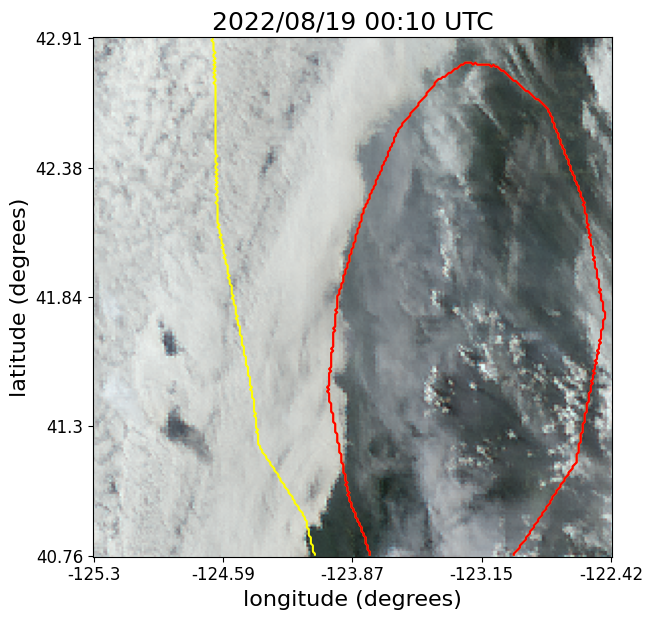

sunrise diff:  13:18:28
sunset diff:   1 day, 2:59:52
G16_s20221992330209_e20221992339517_21.tif


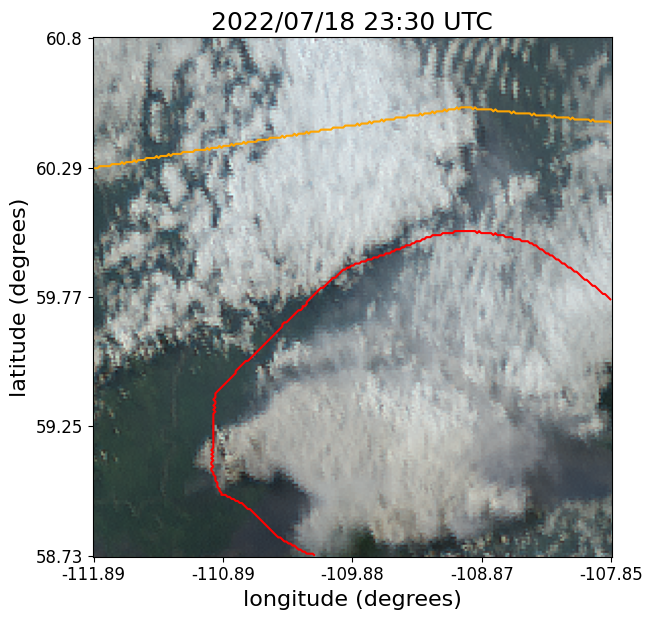

sunrise diff:  12:59:08
sunset diff:   4:48:52
G16_s20222370040203_e20222370049511_24.tif


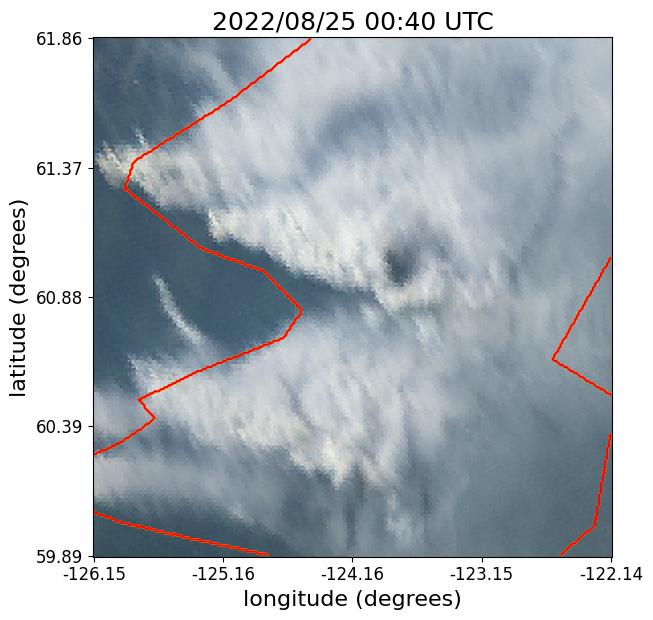

sunrise diff:  12:13:04
sunset diff:   1 day, 3:04:04


In [15]:
density = 'Heavy' #'Light' 'Medium'
truth_fns = data_dict['test']['truth']
random.shuffle(truth_fns)
num_imgs = 3 #len(data_dict['test']['truth'])
num = 0
#truth_fns = random.choices(data_dict['test']['truth'], k=num_imgs)
for truth_fn in truth_fns:
    if density in truth_fn:
        fn = truth_fn.split('/')[-1]
        print(fn)
        plot_densities_from_processed_data(fn, data_loc="/scratch/alpine/mecr8410/semantic_segmentation_smoke/SmokeViz/")
        dt = get_dt_from_fn(fn)
        lat, lon = get_center_lat_lon(fn)
        sr, ss = get_sunrise_sunset(dt, lat, lon)        
        num+=1
        if num >= num_imgs:
            break

In [ ]:
fn = 'G16_s20220722330205_e20220722339513_77.tif'
dt = get_dt_from_fn(fn)
lat, lon = get_center_lat_lon(fn)
sr, ss = get_sunrise_sunset(dt, lat, lon)